In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("USA_Housing.csv")

In [3]:
df

,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Price,Unnamed: 4
0,5.682861,7.009188,4.09,1.059034e+06,NaN
1,6.002900,6.730821,3.09,1.505891e+06,NaN
2,5.865890,8.512727,5.13,1.058988e+06,NaN
3,7.188236,5.586729,3.26,1.260617e+06,NaN
4,5.040555,7.839388,4.23,6.309435e+05,NaN
...,...,...,...,...,...
4995,7.830362,6.137356,3.46,1.060194e+06,NaN
4996,6.999135,6.576763,4.02,1.482618e+06,NaN
4997,7.250591,4.805081,2.13,1.030730e+06,NaN
4998,5.534388,7.130144,5.44,1.198657e+06,NaN


In [5]:
epochs=1000 

In [8]:
n = float(len(df['Price']))

In [52]:
def regression(l):
        m=0
        m1=0
        m2=0
        c=0
        Loss=[]
        L=l
        for i in range(epochs):
            y_prime=(m*df["Avg. Area House Age"]+m1*df["Avg. Area Number of Rooms"]+m2*df["Avg. Area Number of Bedrooms"])  + c
            dm=(-2/n) *sum((df["Price"]-y_prime)*df["Avg. Area House Age"])
            dm1=(-2/n) *sum((df["Price"]-y_prime)*df["Avg. Area Number of Rooms"])
            dm2=(-2/n) *sum((df["Price"]-y_prime)*df["Avg. Area Number of Bedrooms"])
            dc=(-2/n)*sum((df["Price"])-y_prime)
            loss=round((sum((df["Price"]-y_prime)**2))/5000,2)
            Loss.append([i,loss])
            a=m
            a1=m1
            a2=m2
            c1=c
            m=round(m-dm*L,5)
            m1=round(m1-dm1*L,5)
            m2=round(m2-dm2*L,5)
            c=round(c-dc*L,5)
            round(c,5)
            if(m==a or m1==a1 or m2==a2 or c==c1):
                 break

            if(dm==0 or dm1==0 or dm2==0 or dc==0):
                break0
            if(loss<30):
                break


        #print(m,m1,m2,c,loss)   
        #print(Loss)
        yield Loss
l1=regression(0.00061)
l2=regression(0.0055)
l3=regression(0.00011)
l4=regression(0.00053)

Text(0, 0.5, 'loss')

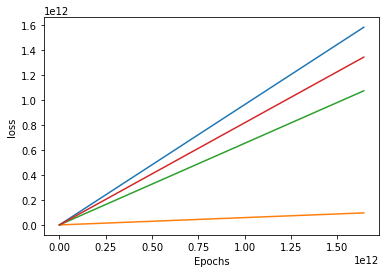

In [53]:
plt.plot(l1[0],l1[1])
plt.plot(l2[0],l2[1])
plt.plot(l3[0],l3[1])
plt.plot(l4[0],l4[1])
plt.xlabel("Epochs")
plt.ylabel("loss")

<function matplotlib.pyplot.show(*args, **kw)>

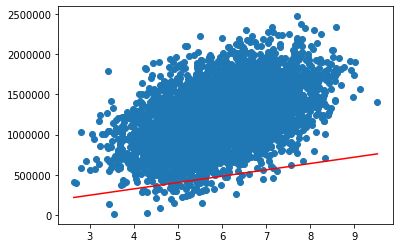

In [54]:
y=m*df["Avg. Area House Age"]+c
plt.scatter(df["Avg. Area House Age"],df["Price"])
plt.plot([min(df["Avg. Area House Age"]),max(df["Avg. Area House Age"])],[min(y),max(y)],color='red')
plt.show